# Lesson 1 - What's your pet

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
path = untar_data(URLs.PETS); path

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [5]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_78.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_52.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_125.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_109.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_235.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

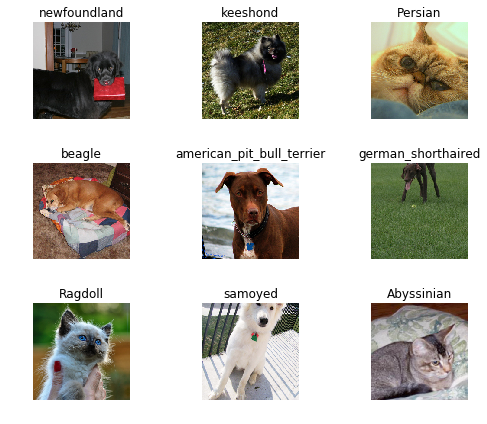

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.load('l1');

In [9]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.886394,0.327244,0.085250,01:54


# classLosses

In [0]:
!git clone https://github.com/muellerzr/ClassLosses.git

In [0]:
from ClassLosses.classLosses import *

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [14]:
interp.most_confused()[1]

('Russian_Blue', 'British_Shorthair', 6)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

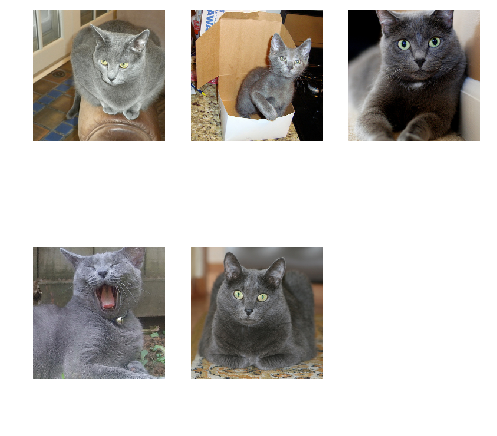

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

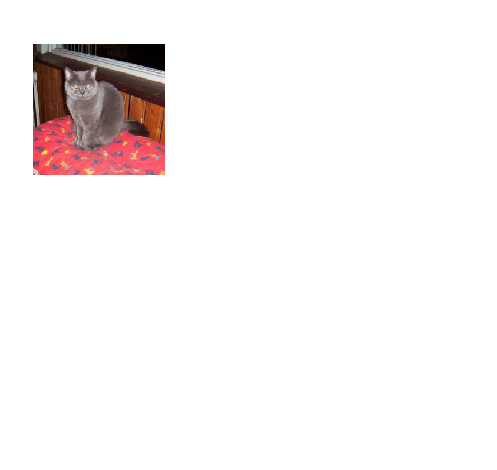

<IPython.core.display.Javascript object>

In [12]:
ClassLosses(interp, 5, 'Russian_Blue', 'British_Shorthair')